In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

In [2]:
%matplotlib inline

In [3]:
x, y = load_digits(return_X_y = True)
x.shape

(1797, 64)

In [4]:
x, y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

<Figure size 432x288 with 0 Axes>

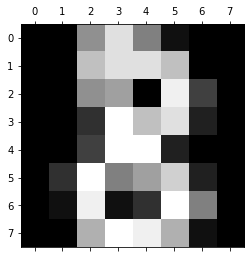

In [5]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[8])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [7]:
# x_train - часть данных х, используемых для построения модели
# x_test - часть данных х, используемых для тестирования модели
# y_train - часть у, соответствующих x_train
# y_test - часть у, соответствующих x_test

In [8]:
# Маштабирование (нулевое Мат. ожидание и единичная дисперсия, может улучшить структуру классификации)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [9]:
x_train

array([[ 0.        , -0.33790435, -1.09141592, ...,  1.58325794,
         3.53125595,  3.30213343],
       [ 0.        ,  2.90642897,  1.41696421, ...,  1.58325794,
         0.00595786, -0.18695903],
       [ 0.        ,  0.74354009,  0.99890086, ..., -1.14493411,
        -0.49765616, -0.18695903],
       ...,
       [ 0.        , -0.33790435, -0.04625753, ..., -1.14493411,
        -0.49765616, -0.18695903],
       [ 0.        , -0.33790435, -0.25528921, ..., -1.14493411,
        -0.49765616, -0.18695903],
       [ 0.        , -0.33790435,  0.16277415, ...,  0.73069792,
        -0.49765616, -0.18695903]])

In [10]:
model = LogisticRegression(solver = 'liblinear', C = 0.05, multi_class = 'ovr', random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [11]:
x_test

array([[ 0.        , -0.32407053,  1.26608154, ...,  1.00149203,
         3.00690579,  3.20574326],
       [ 0.        ,  0.87866546,  2.13013719, ..., -0.98859333,
        -0.53932217, -0.23025994],
       [ 0.        ,  2.08140146,  1.69810936, ...,  1.49901337,
         3.00690579,  1.05824126],
       ...,
       [ 0.        ,  0.87866546,  0.83405371, ..., -0.49107199,
        -0.53932217, -0.23025994],
       [ 0.        , -0.32407053, -1.11007149, ...,  1.33317292,
        -0.09604367, -0.23025994],
       [ 0.        , -0.32407053, -1.11007149, ...,  0.83565158,
        -0.53932217, -0.23025994]])

In [12]:
y_pred = model.predict(x_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       9, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 1, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 7, 8, 0, 1, 5, 2, 5, 3, 4, 1, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 7, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 3, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 0, 2, 0, 7, 6, 1, 1,
       3, 7, 2, 7, 8, 5, 5, 7, 5, 2, 2, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [13]:
y_pred_prob = model.predict_proba(x_test)

In [14]:
model.score(x_train, y_train)

0.964509394572025

In [15]:
model.score(x_test, y_test)

0.95

In [16]:
cm = confusion_matrix(y_test, y_pred)

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)

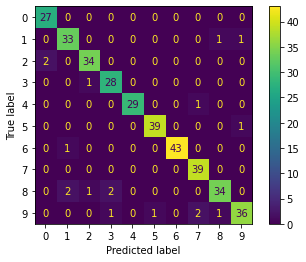

In [18]:
disp.plot()

In [19]:
print(classification_report(y_test, y_pred))
# f1 - средняя гармоническая между precision и recall

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       0.92      0.94      0.93        35
           2       0.94      0.94      0.94        36
           3       0.90      0.97      0.93        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       0.93      1.00      0.96        39
           8       0.94      0.87      0.91        39
           9       0.95      0.88      0.91        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [20]:
# ROC-кривая
y_test = label_binarize(y_test, classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_test

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [21]:
y_pred_prob

array([[0.06007427, 0.02681728, 0.701936  , ..., 0.09535805, 0.02363706,
        0.01721318],
       [0.00920567, 0.01803594, 0.1540256 , ..., 0.00413687, 0.47578598,
        0.08232454],
       [0.00776743, 0.03538639, 0.7852114 , ..., 0.03114683, 0.01900398,
        0.02067183],
       ...,
       [0.03091399, 0.11946221, 0.04404864, ..., 0.07629102, 0.23622964,
        0.04516919],
       [0.01834137, 0.12084205, 0.05787707, ..., 0.10055323, 0.29492434,
        0.01948664],
       [0.02165862, 0.08069844, 0.01233718, ..., 0.02301937, 0.37363851,
        0.17669524]])

In [22]:
from sklearn.metrics import roc_auc_score

In [23]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
n_class = y_test.shape[1]

In [24]:
n_class

10

In [25]:
for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [26]:
# Compute micro_average ROC curve and ROC area
fpr['micro'], tpr['micro'], _ = roc_curve(y_test.ravel(), y_pred_prob.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

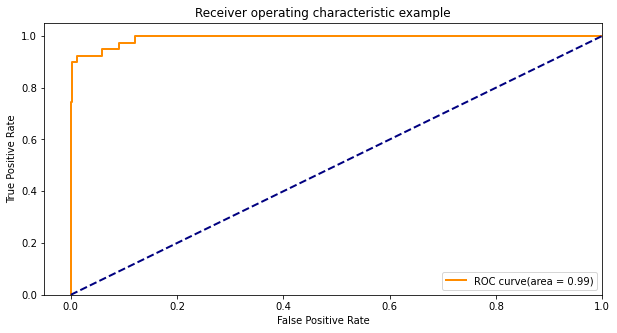

In [27]:
plt.figure(figsize = (10, 5))
lw = 2
plt.plot(fpr[8], tpr[8], color = 'darkorange',
        lw = lw, label = 'ROC curve(area = %0.2f)' % roc_auc[8])
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([-0.05, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

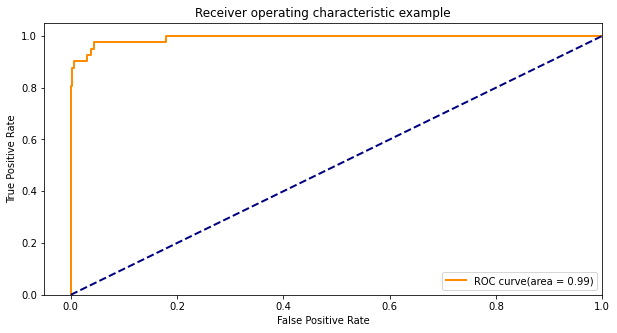

In [28]:
plt.figure(figsize = (10, 5))
lw = 2
plt.plot(fpr[9], tpr[9], color = 'darkorange',
        lw = lw, label = 'ROC curve(area = %0.2f)' % roc_auc[9])
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([-0.05, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = 'lower right')
plt.show()

In [29]:
roc_auc

{0: 1.0,
 1: 0.9876923076923078,
 2: 0.9996570644718793,
 3: 0.9989582248150849,
 4: 0.9979797979797981,
 5: 0.994921875,
 6: 0.9996403912543153,
 7: 0.9990414569853823,
 8: 0.9922517772985062,
 9: 0.9925070724061473,
 'micro': 0.9964591906721536}

<ipython-input-36-f4966e05570a>:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


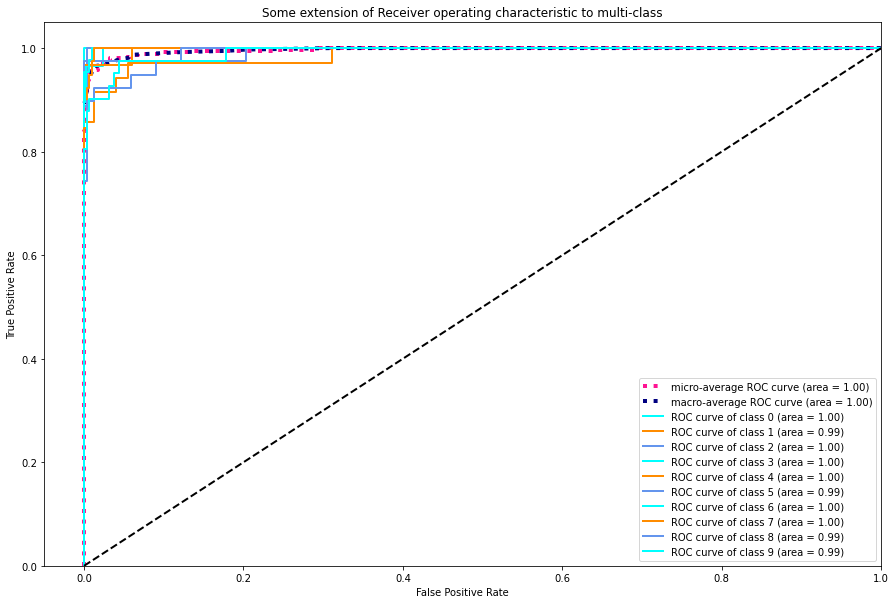

In [36]:
# First aggregate all false positive rates
from scipy import interp
from itertools import cycle
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
# Finally average it and compute AUC
mean_tpr /= n_class

fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

# Plot all ROC curves
plt.figure(figsize = (15, 10))
plt.plot(fpr['micro'], tpr['micro'], 
         label = 'micro-average ROC curve (area = {0:0.2f})'.format(roc_auc['micro']),
         color = 'deeppink',linestyle = ':', linewidth = 4)
plt.plot(fpr['macro'], tpr['macro'], 
         label = 'macro-average ROC curve (area = {0:0.2f})'.format(roc_auc['macro']),
         color = 'navy', linestyle = ':', linewidth = 4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

# после i был пропущен итератор color
for i, color in zip(range(n_class), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw = lw,
            label = 'ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw = lw)
plt.xlim([-0.05, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc = 'lower right')
plt.show()